# Experiment 5: Aleatory Linear and Circle

This experiment explores the differences between Linear and Circle CBNs, focus on attractor fields differences.
For the analysis, we generate a local network template and use it in every local network of the Linear and Circle CBNs.


In [125]:
import matplotlib.pyplot as plt
import numpy as np
# external imports
import pandas as pd

# Read the database
df = pd.read_csv("exp5_aleatory_linear_circle_3_9_1000.csv")
df = df.rename(columns={'Unnamed: 0': 'id_register'})
df['id_register'] = df['id_register'] + 1
df.keys()

Index(['id_register', 'i_sample', 'n_local_networks', 'n_var_network',
       'v_topology', 'n_output_variables', 'n_clauses_function',
       'n_local_attractors', 'n_pair_attractors', 'n_attractor_fields',
       'n_time_find_attractors', 'n_time_find_pairs', 'n_time_find_fields'],
      dtype='object')

In [126]:
df.head(10)

,id_register,i_sample,n_local_networks,n_var_network,v_topology,n_output_variables,n_clauses_function,n_local_attractors,n_pair_attractors,n_attractor_fields,n_time_find_attractors,n_time_find_pairs,n_time_find_fields
0,1,1,3,5,4,2,2,10,12,8,0.056252,0.000032,0.000049
1,2,1,3,5,3,2,2,12,24,8,0.075212,0.000041,0.000209
2,3,2,3,5,4,2,2,5,3,1,0.041635,0.000022,0.000015
3,4,2,3,5,3,2,2,6,6,1,0.065077,0.000029,0.000026
4,5,3,3,5,4,2,2,10,12,8,0.065546,0.000031,0.000056
5,6,3,3,5,3,2,2,12,24,8,0.067046,0.000027,0.000182
6,7,4,3,5,4,2,2,8,5,2,0.074340,0.000058,0.000048
7,8,4,3,5,3,2,2,9,9,1,0.085285,0.000026,0.000031
8,9,5,3,5,4,2,2,5,3,1,0.044352,0.000025,0.000017
9,10,5,3,5,3,2,2,6,6,1,0.057276,0.000061,0.000032


## Explore the data from Linear(4) and Circular(3) CBN

### Group by Topology and number of local Networks and show the mean of the number of local attractors

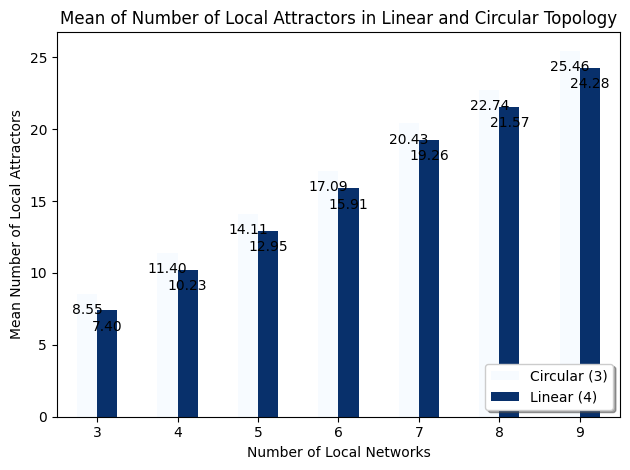

In [127]:
# Group by 'v_topology' and put the mean of 'n_local_attractors'
grouped_df = df.groupby(['n_local_networks', 'v_topology'])

# Create the bar plot with different colors for each group
ax = grouped_df['n_local_attractors'].mean().unstack().plot(kind='bar', colormap='Blues')

# Assign labels and title
ax.set_xlabel('Number of Local Networks')
ax.set_ylabel('Mean Number of Local Attractors')
# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.title("Mean of Number of Local Attractors in Linear and Circular Topology")

# Add labels with exact values inside each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height() - 1.15),
                ha='center', va='center', xytext=(0, 0), textcoords='offset points')

# Create a custom legend
legend_labels = {3: 'Circular', 4: 'Linear'}
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, [f'{legend_labels[int(label)]:s} ({label:s})' for label in labels],
          loc='lower right', bbox_to_anchor=(1, 0), fancybox=True, shadow=True)

# Show the plot
plt.tight_layout()
plt.show()



### Group by Topology and number of local Networks and show the mean of the number of attractor pairs

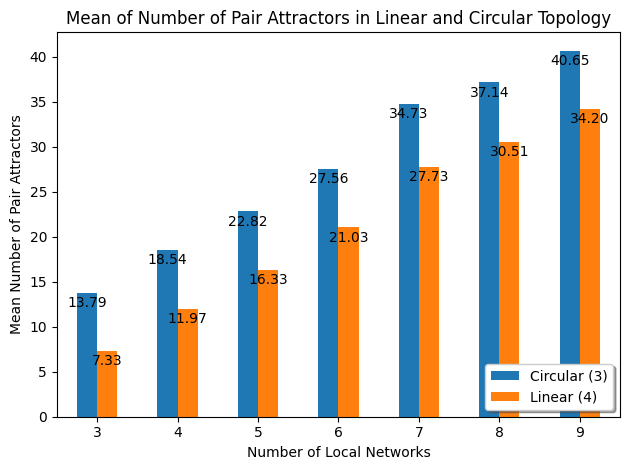

In [128]:
# Create the bar plot with different colors for each group
ax = grouped_df['n_pair_attractors'].mean().unstack().plot(kind='bar')

# Assign labels and title
ax.set_xlabel('Number of Local Networks')
ax.set_ylabel('Mean Number of Pair Attractors')
# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.title("Mean of Number of Pair Attractors in Linear and Circular Topology")

# Add labels with exact values inside each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height() - 1.15),
                ha='center', va='center', xytext=(0, 0), textcoords='offset points')

# Create a custom legend
legend_labels = {3: 'Circular', 4: 'Linear'}
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, [f'{legend_labels[int(label)]:s} ({label:s})' for label in labels],
          loc='lower right', bbox_to_anchor=(1, 0), fancybox=True, shadow=True)

# Show the plot
plt.tight_layout()
plt.show()


### Group by Topology and number of local Networks and show the mean of the number of attractor fields

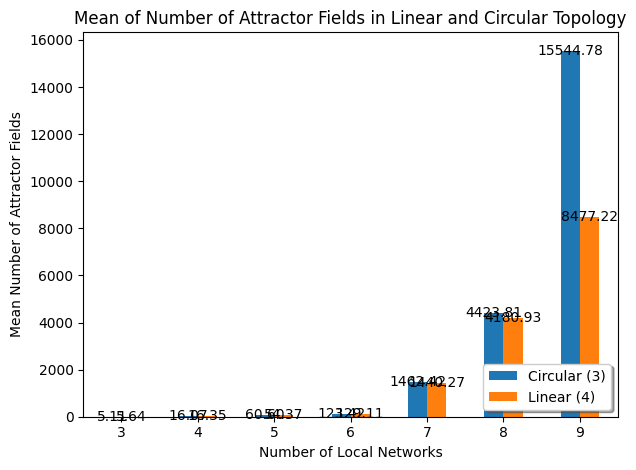

In [129]:
# Create the bar plot with different colors for each group
ax = grouped_df['n_attractor_fields'].mean().unstack().plot(kind='bar')

# Assign labels and title
ax.set_xlabel('Number of Local Networks')
ax.set_ylabel('Mean Number of Attractor Fields')
# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.title("Mean of Number of Attractor Fields in Linear and Circular Topology")

# Add labels with exact values inside each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height() - 1.15),
                ha='center', va='center', xytext=(0, 0), textcoords='offset points')

# Create a custom legend
legend_labels = {3: 'Circular', 4: 'Linear'}
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, [f'{legend_labels[int(label)]:s} ({label:s})' for label in labels],
          loc='lower right', bbox_to_anchor=(1, 0), fancybox=True, shadow=True)

# Show the plot
plt.tight_layout()
plt.show()


## Individual Analysis by number of local networks

### Violin Graphs

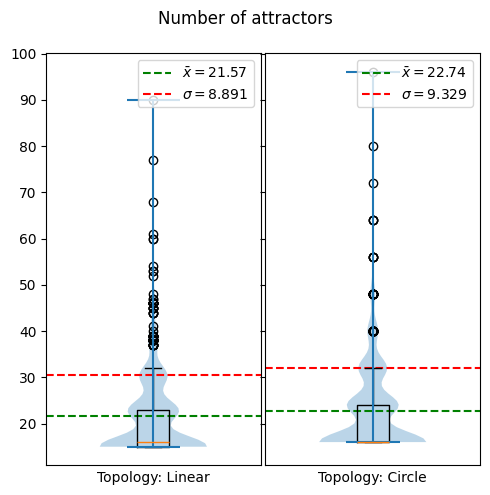

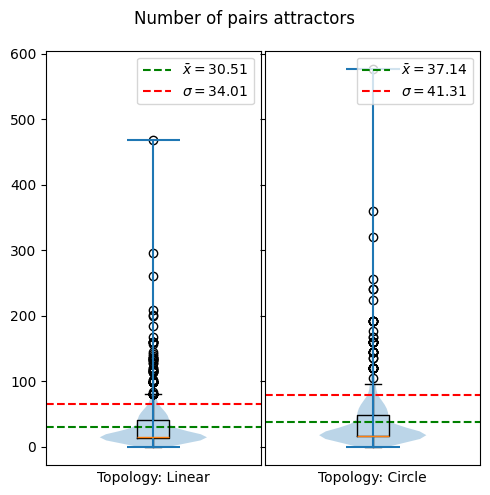

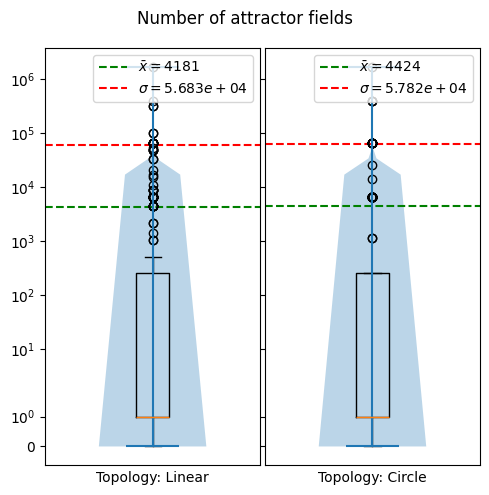

In [130]:
# Filter the graphs
df_local_networks_n = df[df['n_local_networks'] == 8]
# df_local_networks_n = df[df['n_local_networks'] == 4]
# df_local_networks_n[df_local_networks_n['v_topology'] == 3].describe()
# df_local_networks_n[df_local_networks_n['v_topology'] == 3].describe()

# Violin graphs
l_topologies = df_local_networks_n['v_topology'].unique()
labels_topologies = {4: "Linear", 3: "Circle"}
grouped = df_local_networks_n.groupby("n_local_networks")

labels = {key: label for key, label in zip(df_local_networks_n.keys()[-6:-3], [
    "Number of attractors",
    "Number of pairs attractors",
    "Number of attractor fields"])}
log_scale = {key: label for key, label in zip(df_local_networks_n.keys()[-6:-3], [False, False, True])}
grouped = df_local_networks_n.groupby("v_topology")

for key in df_local_networks_n.keys()[-6:-3]:
    fig, axs = plt.subplots(1, l_topologies.size, sharey=True, figsize=(5, 5))
    for ax, i_topology in zip(axs, l_topologies):
        group = grouped.get_group(i_topology)
        data = group[key]
        mean = ax.axhline(y=data.mean(), xmin=0.0, xmax=1.0, color='g', ls='--',
                          label=fr'$\bar{{x}}={data.mean():.4g}$')
        std_max = ax.axhline(y=data.mean() + data.std(), xmin=0.0, xmax=1.0, color='r', ls='--',
                             label=fr'$\sigma={data.std():.4g}$')
        ax.legend()
        if log_scale[key]:
            ax.set_yscale('symlog')
        ax.boxplot(data)
        ax.violinplot(data)
        ax.set_xlabel(f'Topology: {labels_topologies[i_topology]}')
        ax.set_xticks([])
        ax.set_xlim((0.5, 1.5))
    fig.suptitle(labels[key])
    fig.tight_layout(w_pad=0)


### Linear - Circle Analysis: Top 20 

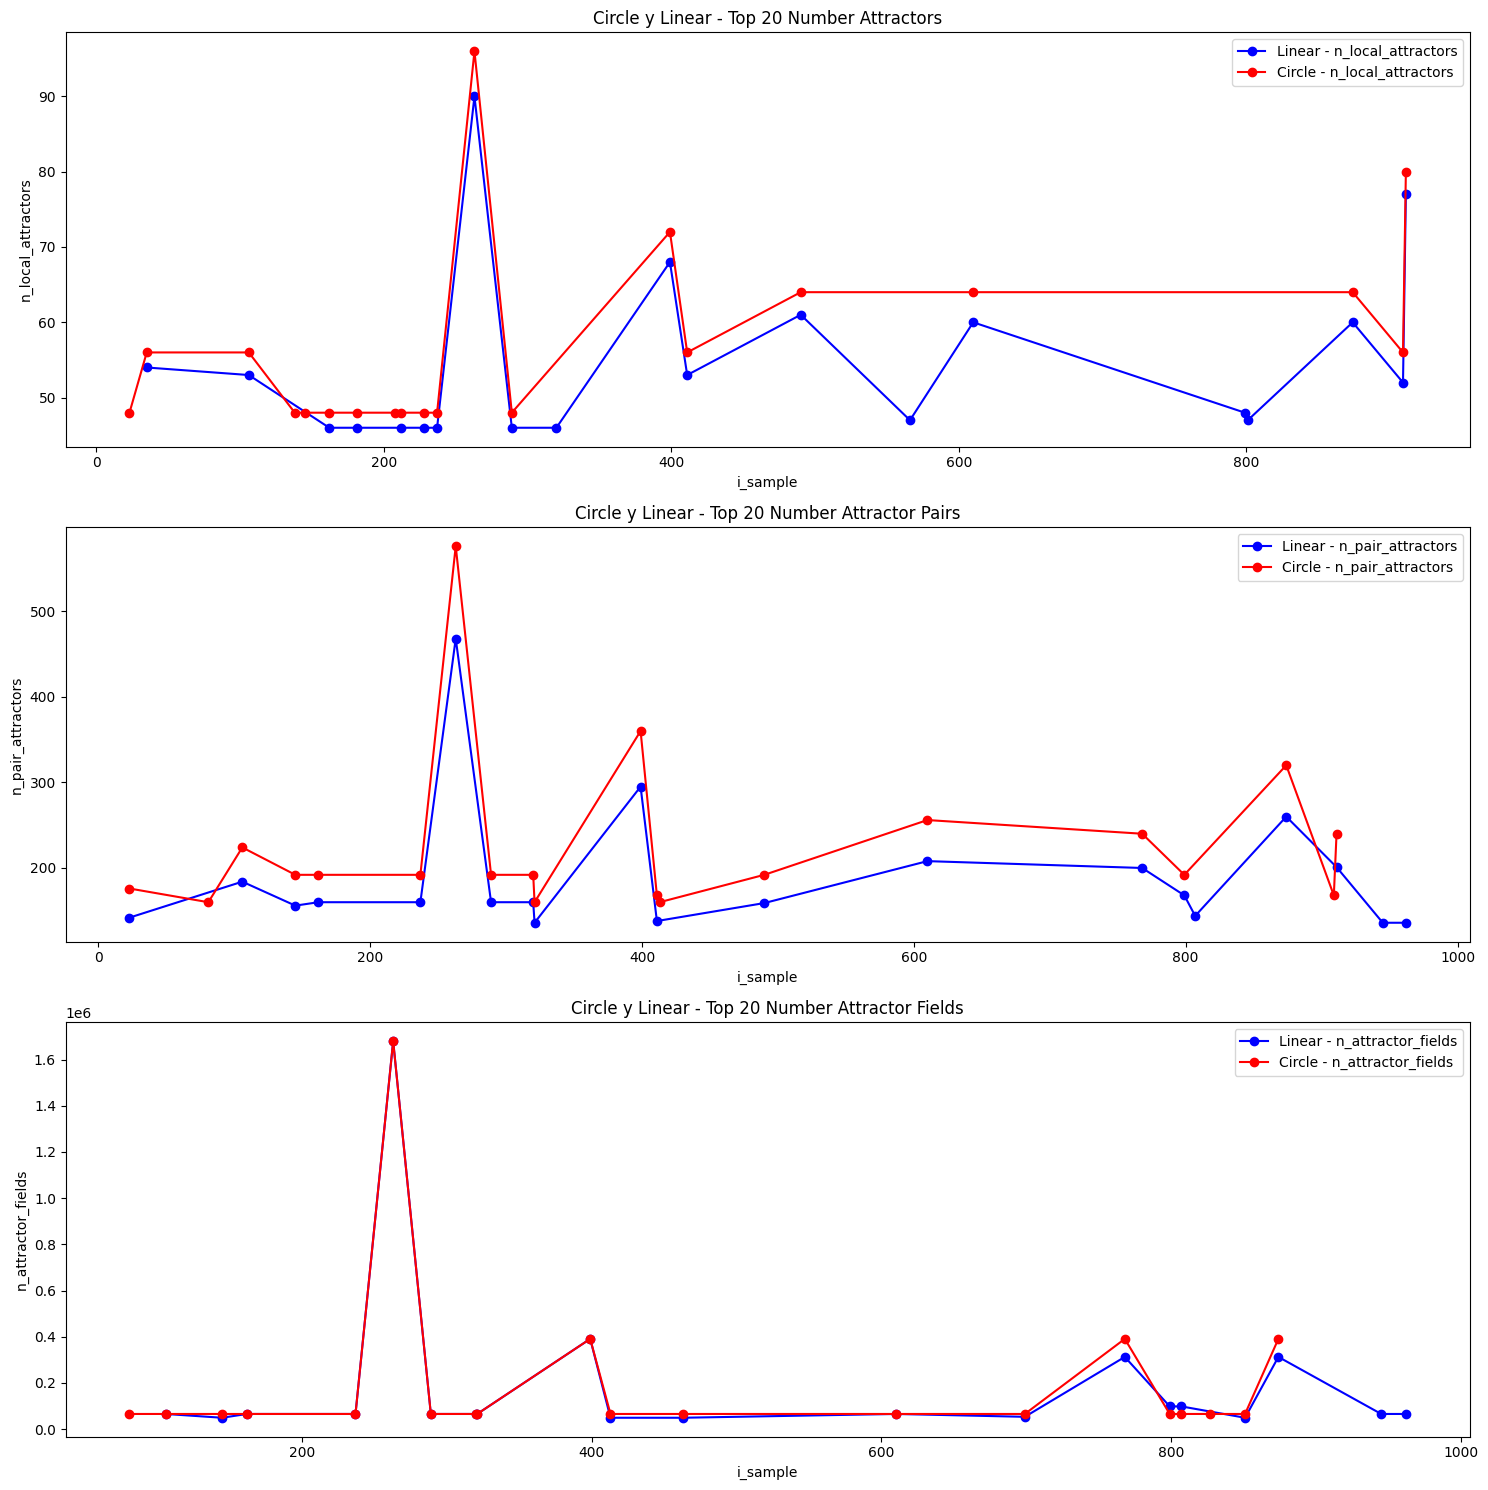

In [131]:
# Filtrar por v_topology
df_v4 = df_local_networks_n[df_local_networks_n['v_topology'] == 4]
df_v3 = df_local_networks_n[df_local_networks_n['v_topology'] == 3]

# Seleccionar los 20 mejores valores de df_v4 y df_v3 para cada métrica
top_20_v4_attractors = df_v4.nlargest(20, 'n_local_attractors')
top_20_v3_attractors = df_v3.nlargest(20, 'n_local_attractors')

top_20_v4_pairs = df_v4.nlargest(20, 'n_pair_attractors')
top_20_v3_pairs = df_v3.nlargest(20, 'n_pair_attractors')

top_20_v4_fields = df_v4.nlargest(20, 'n_attractor_fields')
top_20_v3_fields = df_v3.nlargest(20, 'n_attractor_fields')

# Ordenar los DataFrames por 'i_sample'
top_20_v4_attractors = top_20_v4_attractors.sort_values('i_sample')
top_20_v3_attractors = top_20_v3_attractors.sort_values('i_sample')

top_20_v4_pairs = top_20_v4_pairs.sort_values('i_sample')
top_20_v3_pairs = top_20_v3_pairs.sort_values('i_sample')

top_20_v4_fields = top_20_v4_fields.sort_values('i_sample')
top_20_v3_fields = top_20_v3_fields.sort_values('i_sample')

# Crear gráfico combinado de línea para 'n_local_attractors', 'n_pair_attractors' y 'n_attractor_fields'
plt.figure(figsize=(15, 15))

# Gráfico para 'n_local_attractors'
plt.subplot(3, 1, 1)
plt.plot(top_20_v4_attractors['i_sample'], top_20_v4_attractors['n_local_attractors'], 'o-', color='blue', label='Linear - n_local_attractors')
plt.plot(top_20_v3_attractors['i_sample'], top_20_v3_attractors['n_local_attractors'], 'o-', color='red', label='Circle - n_local_attractors')
plt.title('Circle y Linear - Top 20 Number Attractors')
plt.xlabel('i_sample')
plt.ylabel('n_local_attractors')
plt.legend()

# Gráfico para 'n_pair_attractors'
plt.subplot(3, 1, 2)
plt.plot(top_20_v4_pairs['i_sample'], top_20_v4_pairs['n_pair_attractors'], 'o-', color='blue', label='Linear - n_pair_attractors')
plt.plot(top_20_v3_pairs['i_sample'], top_20_v3_pairs['n_pair_attractors'], 'o-', color='red', label='Circle - n_pair_attractors')
plt.title('Circle y Linear - Top 20 Number Attractor Pairs')
plt.xlabel('i_sample')
plt.ylabel('n_pair_attractors')
plt.legend()

# Gráfico para 'n_attractor_fields'
plt.subplot(3, 1, 3)
plt.plot(top_20_v4_fields['i_sample'], top_20_v4_fields['n_attractor_fields'], 'o-', color='blue', label='Linear - n_attractor_fields')
plt.plot(top_20_v3_fields['i_sample'], top_20_v3_fields['n_attractor_fields'], 'o-', color='red', label='Circle - n_attractor_fields')
plt.title('Circle y Linear - Top 20 Number Attractor Fields')
plt.xlabel('i_sample')
plt.ylabel('n_attractor_fields')
plt.legend()

plt.tight_layout()
plt.show()
# 20 barras dos 20 maiores

In [132]:
# Filtrar el DataFrame para v_topology=3 y v_topology=4
df_topology_4 = df_local_networks_n[df_local_networks_n['v_topology'] == 4].set_index(['n_local_networks', 'i_sample'])
df_topology_3 = df_local_networks_n[df_local_networks_n['v_topology'] == 3].set_index(['n_local_networks', 'i_sample'])

# Realizar la resta y crear una nueva columna
df_resume = pd.DataFrame({
    'i_index': df_topology_3.index,
    # 'circle_local_attractors' : df_topology_3['n_local_attractors'],
    # 'linear_local_attractors' : df_topology_4['n_local_attractors'],
    # 'circle_attractors_pairs' : df_topology_3['n_pair_attractors'],
    # 'linear_attractors_pairs' : df_topology_4['n_pair_attractors'],
    'circle_attractors_fields' : df_topology_3['n_attractor_fields'],
    'linear_attractors_fields' : df_topology_4['n_attractor_fields']
    })
df_resume = df_resume.replace([np.inf, -np.inf], np.nan).dropna()
df_resume.describe()

,circle_attractors_fields,linear_attractors_fields
count,1.000000e+03,1.000000e+03
mean,4.423814e+03,4.180933e+03
std,5.781642e+04,5.683431e+04
min,0.000000e+00,0.000000e+00
25%,1.000000e+00,1.000000e+00
50%,1.000000e+00,1.000000e+00
75%,2.560000e+02,2.560000e+02
max,1.679616e+06,1.679616e+06


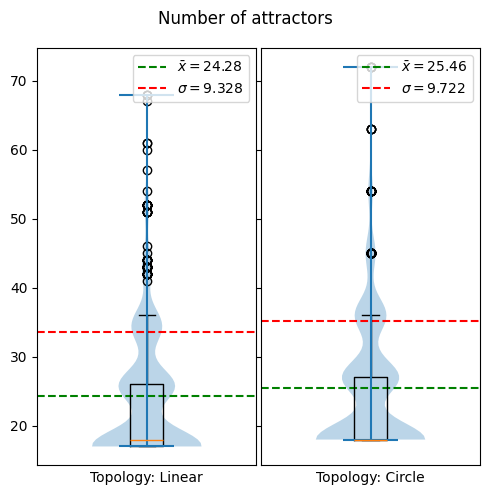

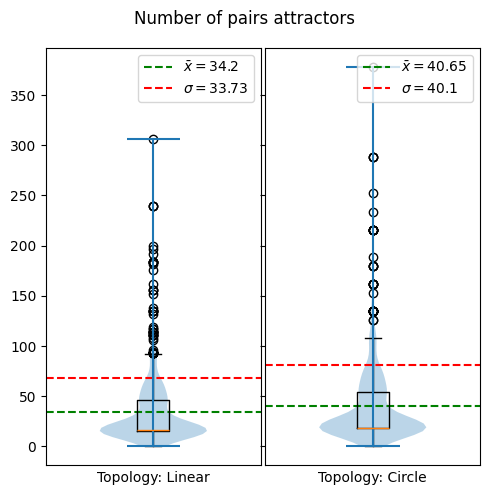

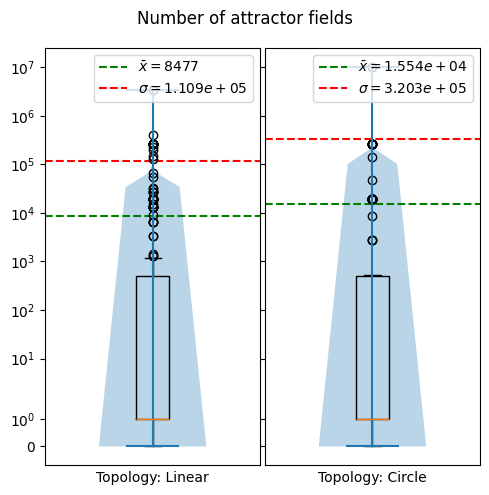

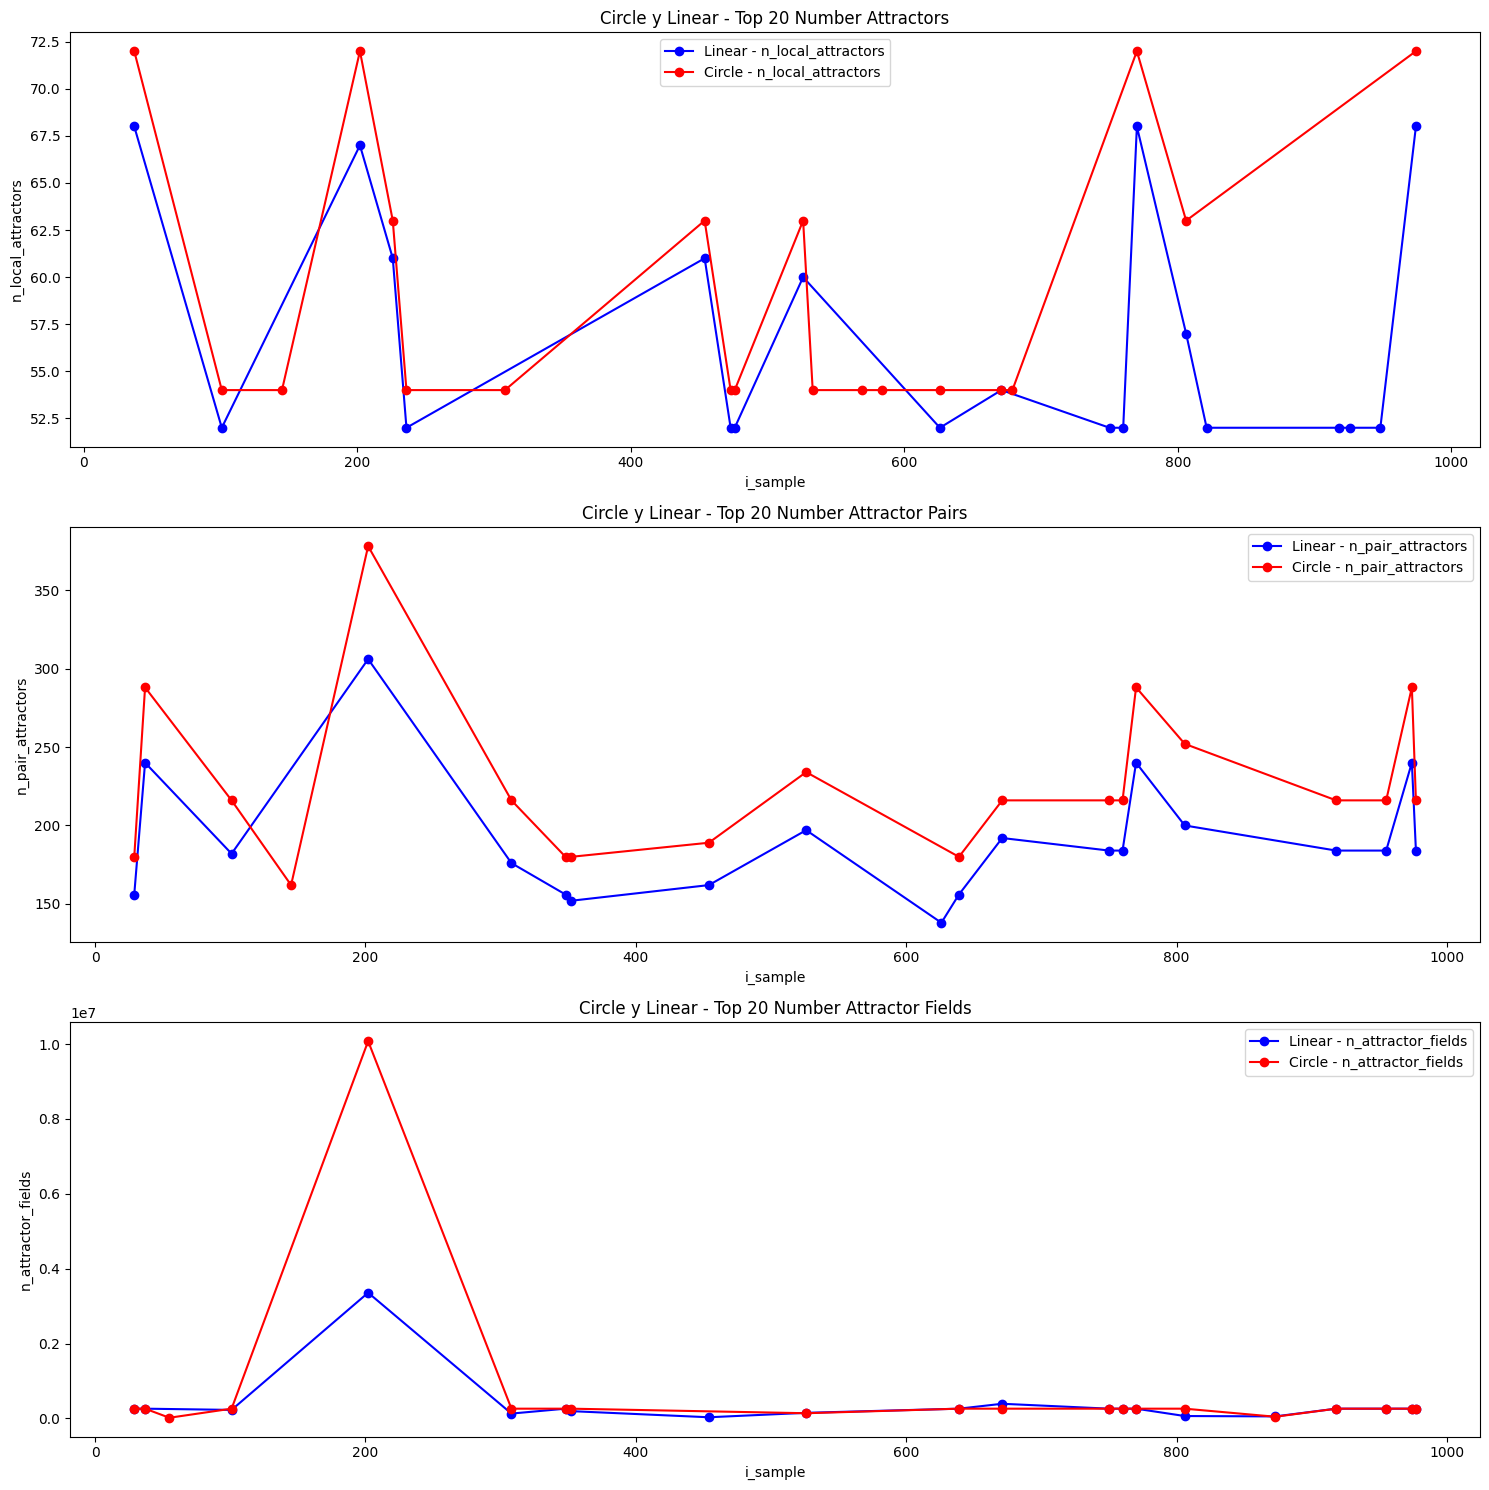

,circle_attractors_fields,linear_attractors_fields
count,1.000000e+03,1.000000e+03
mean,1.554478e+04,8.477224e+03
std,3.202516e+05,1.108681e+05
min,0.000000e+00,0.000000e+00
25%,1.000000e+00,1.000000e+00
50%,1.000000e+00,1.000000e+00
75%,5.120000e+02,5.120000e+02
max,1.007770e+07,3.359232e+06


In [133]:
# Filter the graphs
df_local_networks_n = df[df['n_local_networks'] == 9]
# df_local_networks_n = df[df['n_local_networks'] == 4]
# df_local_networks_n[df_local_networks_n['v_topology'] == 3].describe()
# df_local_networks_n[df_local_networks_n['v_topology'] == 3].describe()

# Violin graphs
l_topologies = df_local_networks_n['v_topology'].unique()
labels_topologies = {4: "Linear", 3: "Circle"}
grouped = df_local_networks_n.groupby("n_local_networks")

labels = {key: label for key, label in zip(df_local_networks_n.keys()[-6:-3], [
    "Number of attractors",
    "Number of pairs attractors",
    "Number of attractor fields"])}
log_scale = {key: label for key, label in zip(df_local_networks_n.keys()[-6:-3], [False, False, True])}
grouped = df_local_networks_n.groupby("v_topology")

for key in df_local_networks_n.keys()[-6:-3]:
    fig, axs = plt.subplots(1, l_topologies.size, sharey=True, figsize=(5, 5))
    for ax, i_topology in zip(axs, l_topologies):
        group = grouped.get_group(i_topology)
        data = group[key]
        mean = ax.axhline(y=data.mean(), xmin=0.0, xmax=1.0, color='g', ls='--',
                          label=fr'$\bar{{x}}={data.mean():.4g}$')
        std_max = ax.axhline(y=data.mean() + data.std(), xmin=0.0, xmax=1.0, color='r', ls='--',
                             label=fr'$\sigma={data.std():.4g}$')
        ax.legend()
        if log_scale[key]:
            ax.set_yscale('symlog')
        ax.boxplot(data)
        ax.violinplot(data)
        ax.set_xlabel(f'Topology: {labels_topologies[i_topology]}')
        ax.set_xticks([])
        ax.set_xlim((0.5, 1.5))
    fig.suptitle(labels[key])
    fig.tight_layout(w_pad=0)

# Filtrar por v_topology
df_v4 = df_local_networks_n[df_local_networks_n['v_topology'] == 4]
df_v3 = df_local_networks_n[df_local_networks_n['v_topology'] == 3]

# Seleccionar los 20 mejores valores de df_v4 y df_v3 para cada métrica
top_20_v4_attractors = df_v4.nlargest(20, 'n_local_attractors')
top_20_v3_attractors = df_v3.nlargest(20, 'n_local_attractors')

top_20_v4_pairs = df_v4.nlargest(20, 'n_pair_attractors')
top_20_v3_pairs = df_v3.nlargest(20, 'n_pair_attractors')

top_20_v4_fields = df_v4.nlargest(20, 'n_attractor_fields')
top_20_v3_fields = df_v3.nlargest(20, 'n_attractor_fields')

# Ordenar los DataFrames por 'i_sample'
top_20_v4_attractors = top_20_v4_attractors.sort_values('i_sample')
top_20_v3_attractors = top_20_v3_attractors.sort_values('i_sample')

top_20_v4_pairs = top_20_v4_pairs.sort_values('i_sample')
top_20_v3_pairs = top_20_v3_pairs.sort_values('i_sample')

top_20_v4_fields = top_20_v4_fields.sort_values('i_sample')
top_20_v3_fields = top_20_v3_fields.sort_values('i_sample')

# Crear gráfico combinado de línea para 'n_local_attractors', 'n_pair_attractors' y 'n_attractor_fields'
plt.figure(figsize=(15, 15))

# Gráfico para 'n_local_attractors'
plt.subplot(3, 1, 1)
plt.plot(top_20_v4_attractors['i_sample'], top_20_v4_attractors['n_local_attractors'], 'o-', color='blue', label='Linear - n_local_attractors')
plt.plot(top_20_v3_attractors['i_sample'], top_20_v3_attractors['n_local_attractors'], 'o-', color='red', label='Circle - n_local_attractors')
plt.title('Circle y Linear - Top 20 Number Attractors')
plt.xlabel('i_sample')
plt.ylabel('n_local_attractors')
plt.legend()

# Gráfico para 'n_pair_attractors'
plt.subplot(3, 1, 2)
plt.plot(top_20_v4_pairs['i_sample'], top_20_v4_pairs['n_pair_attractors'], 'o-', color='blue', label='Linear - n_pair_attractors')
plt.plot(top_20_v3_pairs['i_sample'], top_20_v3_pairs['n_pair_attractors'], 'o-', color='red', label='Circle - n_pair_attractors')
plt.title('Circle y Linear - Top 20 Number Attractor Pairs')
plt.xlabel('i_sample')
plt.ylabel('n_pair_attractors')
plt.legend()

# Gráfico para 'n_attractor_fields'
plt.subplot(3, 1, 3)
plt.plot(top_20_v4_fields['i_sample'], top_20_v4_fields['n_attractor_fields'], 'o-', color='blue', label='Linear - n_attractor_fields')
plt.plot(top_20_v3_fields['i_sample'], top_20_v3_fields['n_attractor_fields'], 'o-', color='red', label='Circle - n_attractor_fields')
plt.title('Circle y Linear - Top 20 Number Attractor Fields')
plt.xlabel('i_sample')
plt.ylabel('n_attractor_fields')
plt.legend()

plt.tight_layout()
plt.show()

# Filtrar el DataFrame para v_topology=3 y v_topology=4
df_topology_4 = df_local_networks_n[df_local_networks_n['v_topology'] == 4].set_index(['n_local_networks', 'i_sample'])
df_topology_3 = df_local_networks_n[df_local_networks_n['v_topology'] == 3].set_index(['n_local_networks', 'i_sample'])

# Realizar la resta y crear una nueva columna
df_resume = pd.DataFrame({
    'i_index': df_topology_3.index,
    # 'circle_local_attractors' : df_topology_3['n_local_attractors'],
    # 'linear_local_attractors' : df_topology_4['n_local_attractors'],
    # 'circle_attractors_pairs' : df_topology_3['n_pair_attractors'],
    # 'linear_attractors_pairs' : df_topology_4['n_pair_attractors'],
    'circle_attractors_fields' : df_topology_3['n_attractor_fields'],
    'linear_attractors_fields' : df_topology_4['n_attractor_fields']
})
df_resume = df_resume.replace([np.inf, -np.inf], np.nan).dropna()
df_resume.describe()